getting ready to test policy
win rate  0.249  loss rate  0.715  draw rate  0.036


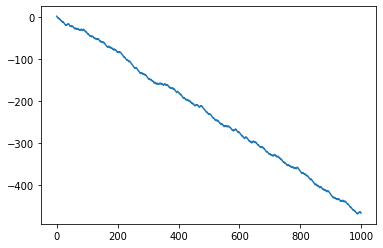

In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make("Blackjack-v1")

Q = {}
agentSumSpace = [i for i in range(4, 22)]
dealerShowCardSpace = [i+1 for i in range(10)]
agentAceSpace = [False, True]
actionSpace = [0, 1] # stick or hit

stateSpace = []
returns = {}
pairsVisited = {}
for total in agentSumSpace:
    for card in dealerShowCardSpace:
        for ace in agentAceSpace:
            for action in agentAceSpace:
                Q[((total, card, ace), action)] = 0
                returns[((total, card, ace), action)] = 0
                pairsVisited[((total, card, ace), action)] = 0
            stateSpace.append((total, card, ace))

policy = {}
for state in stateSpace:
    policy[state] = np.random.choice(actionSpace)

numEpisodes = 1000
rewards = np.zeros(numEpisodes)
totalReward = 0
wins = 0
losses = 0
draws = 0
print("getting ready to test policy")
for i in range(numEpisodes):
    observation = env.reset()
    done = False
    while not done:
        action = policy[observation]
        observation_, reward, done, info = env.step(action)
        observation = observation_
    totalReward += reward
    rewards[i] = totalReward

    if reward >= 1:
        wins += 1
    elif reward == 0:
        draws += 1
    elif reward == -1:
        losses += 1

wins /= numEpisodes
losses /= numEpisodes
draws /= numEpisodes
print("win rate ", wins, " loss rate ", losses, " draw rate ", draws)
plt.plot(rewards)
plt.show()